In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
# set constraints
pd.set_option('display.max_columns', None)

 # 1.0.0 Data

## 1.1.0 Read Data

In [3]:
# Read Excel file
df = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx", engine="openpyxl")

In [4]:
# Check random 5 rows
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
436,33,Yes,Travel_Rarely,587,Research & Development,10,1,Medical,1,584,1,Male,38,1,1,Laboratory Technician,4,Divorced,3408,6705,7,Y,No,13,3,1,80,3,8,2,3,4,3,1,3
1179,34,No,Travel_Rarely,1130,Research & Development,3,3,Life Sciences,1,1658,4,Female,66,3,2,Research Scientist,2,Divorced,5433,19332,1,Y,No,12,3,3,80,1,11,2,3,11,8,7,9
1151,28,No,Travel_Rarely,580,Research & Development,27,3,Medical,1,1622,2,Female,39,1,2,Manufacturing Director,1,Divorced,4877,20460,0,Y,No,21,4,2,80,1,6,5,2,5,3,0,0
1067,47,No,Travel_Rarely,571,Sales,14,3,Medical,1,1503,3,Female,78,3,2,Sales Executive,3,Married,4591,24200,3,Y,Yes,17,3,3,80,1,11,4,2,5,4,1,2
1381,28,No,Non-Travel,1103,Research & Development,16,3,Medical,1,1947,3,Male,49,3,1,Research Scientist,3,Single,2144,2122,1,Y,No,14,3,3,80,0,5,3,2,5,3,1,4
838,42,Yes,Travel_Frequently,481,Sales,12,3,Life Sciences,1,1167,3,Male,44,3,4,Sales Executive,1,Single,13758,2447,0,Y,Yes,12,3,2,80,0,22,2,2,21,9,13,14
590,33,No,Travel_Rarely,213,Research & Development,7,3,Medical,1,817,3,Male,49,3,3,Research Director,3,Married,11691,25995,0,Y,No,11,3,4,80,0,14,3,4,13,9,3,7
703,38,No,Non-Travel,152,Sales,10,3,Technical Degree,1,983,3,Female,85,3,2,Sales Executive,4,Single,5666,19899,1,Y,Yes,13,3,2,80,0,6,1,3,5,3,1,3
996,27,No,Travel_Rarely,205,Sales,10,3,Marketing,1,1403,4,Female,98,2,2,Sales Executive,4,Married,5769,7100,1,Y,Yes,11,3,4,80,0,6,3,3,6,2,4,4
235,43,No,Travel_Rarely,1034,Sales,16,3,Marketing,1,327,4,Female,80,3,4,Manager,4,Married,16064,7744,5,Y,Yes,22,4,3,80,1,22,3,3,17,13,1,9


## 1.2.0 EDA & Basic Data Preprocessing

### 1.2.1 Check NA's values & Identifiers

In [5]:
nan_in_df = df.isnull().sum().any()
 
nan_in_df

False

In [6]:
# Checking for uniqueness
is_unique = df['EmployeeNumber'].is_unique
is_unique

True

### 1.2.2 Check Column Type

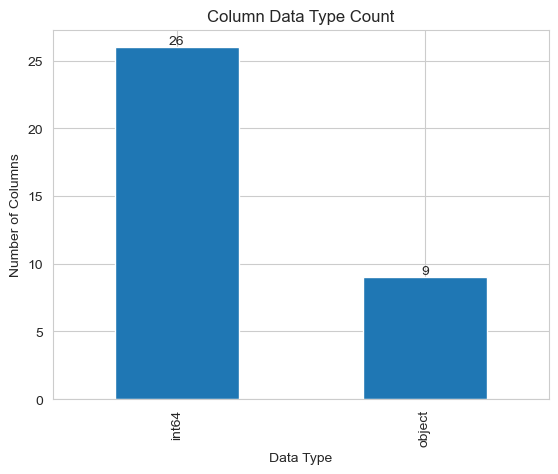

In [7]:
# Count the number of columns for each dtype
dtype_counts = df.dtypes.value_counts()

# Plot
dtype_counts.plot(kind='bar')
plt.xlabel('Data Type')
plt.ylabel('Number of Columns')
plt.title('Column Data Type Count')

# Annotate each bar with the count of the data type
for index, value in enumerate(dtype_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

### 1.2.3 Numerical Features

In [8]:
# Statistic value analysis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
# Dropping 'EmployeeCount' and 'StandardHours' columns
df = df.drop(['EmployeeCount', 'StandardHours'], axis=1)

# Encode 'Attrition' as a binary variable
df['Attrition_binary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

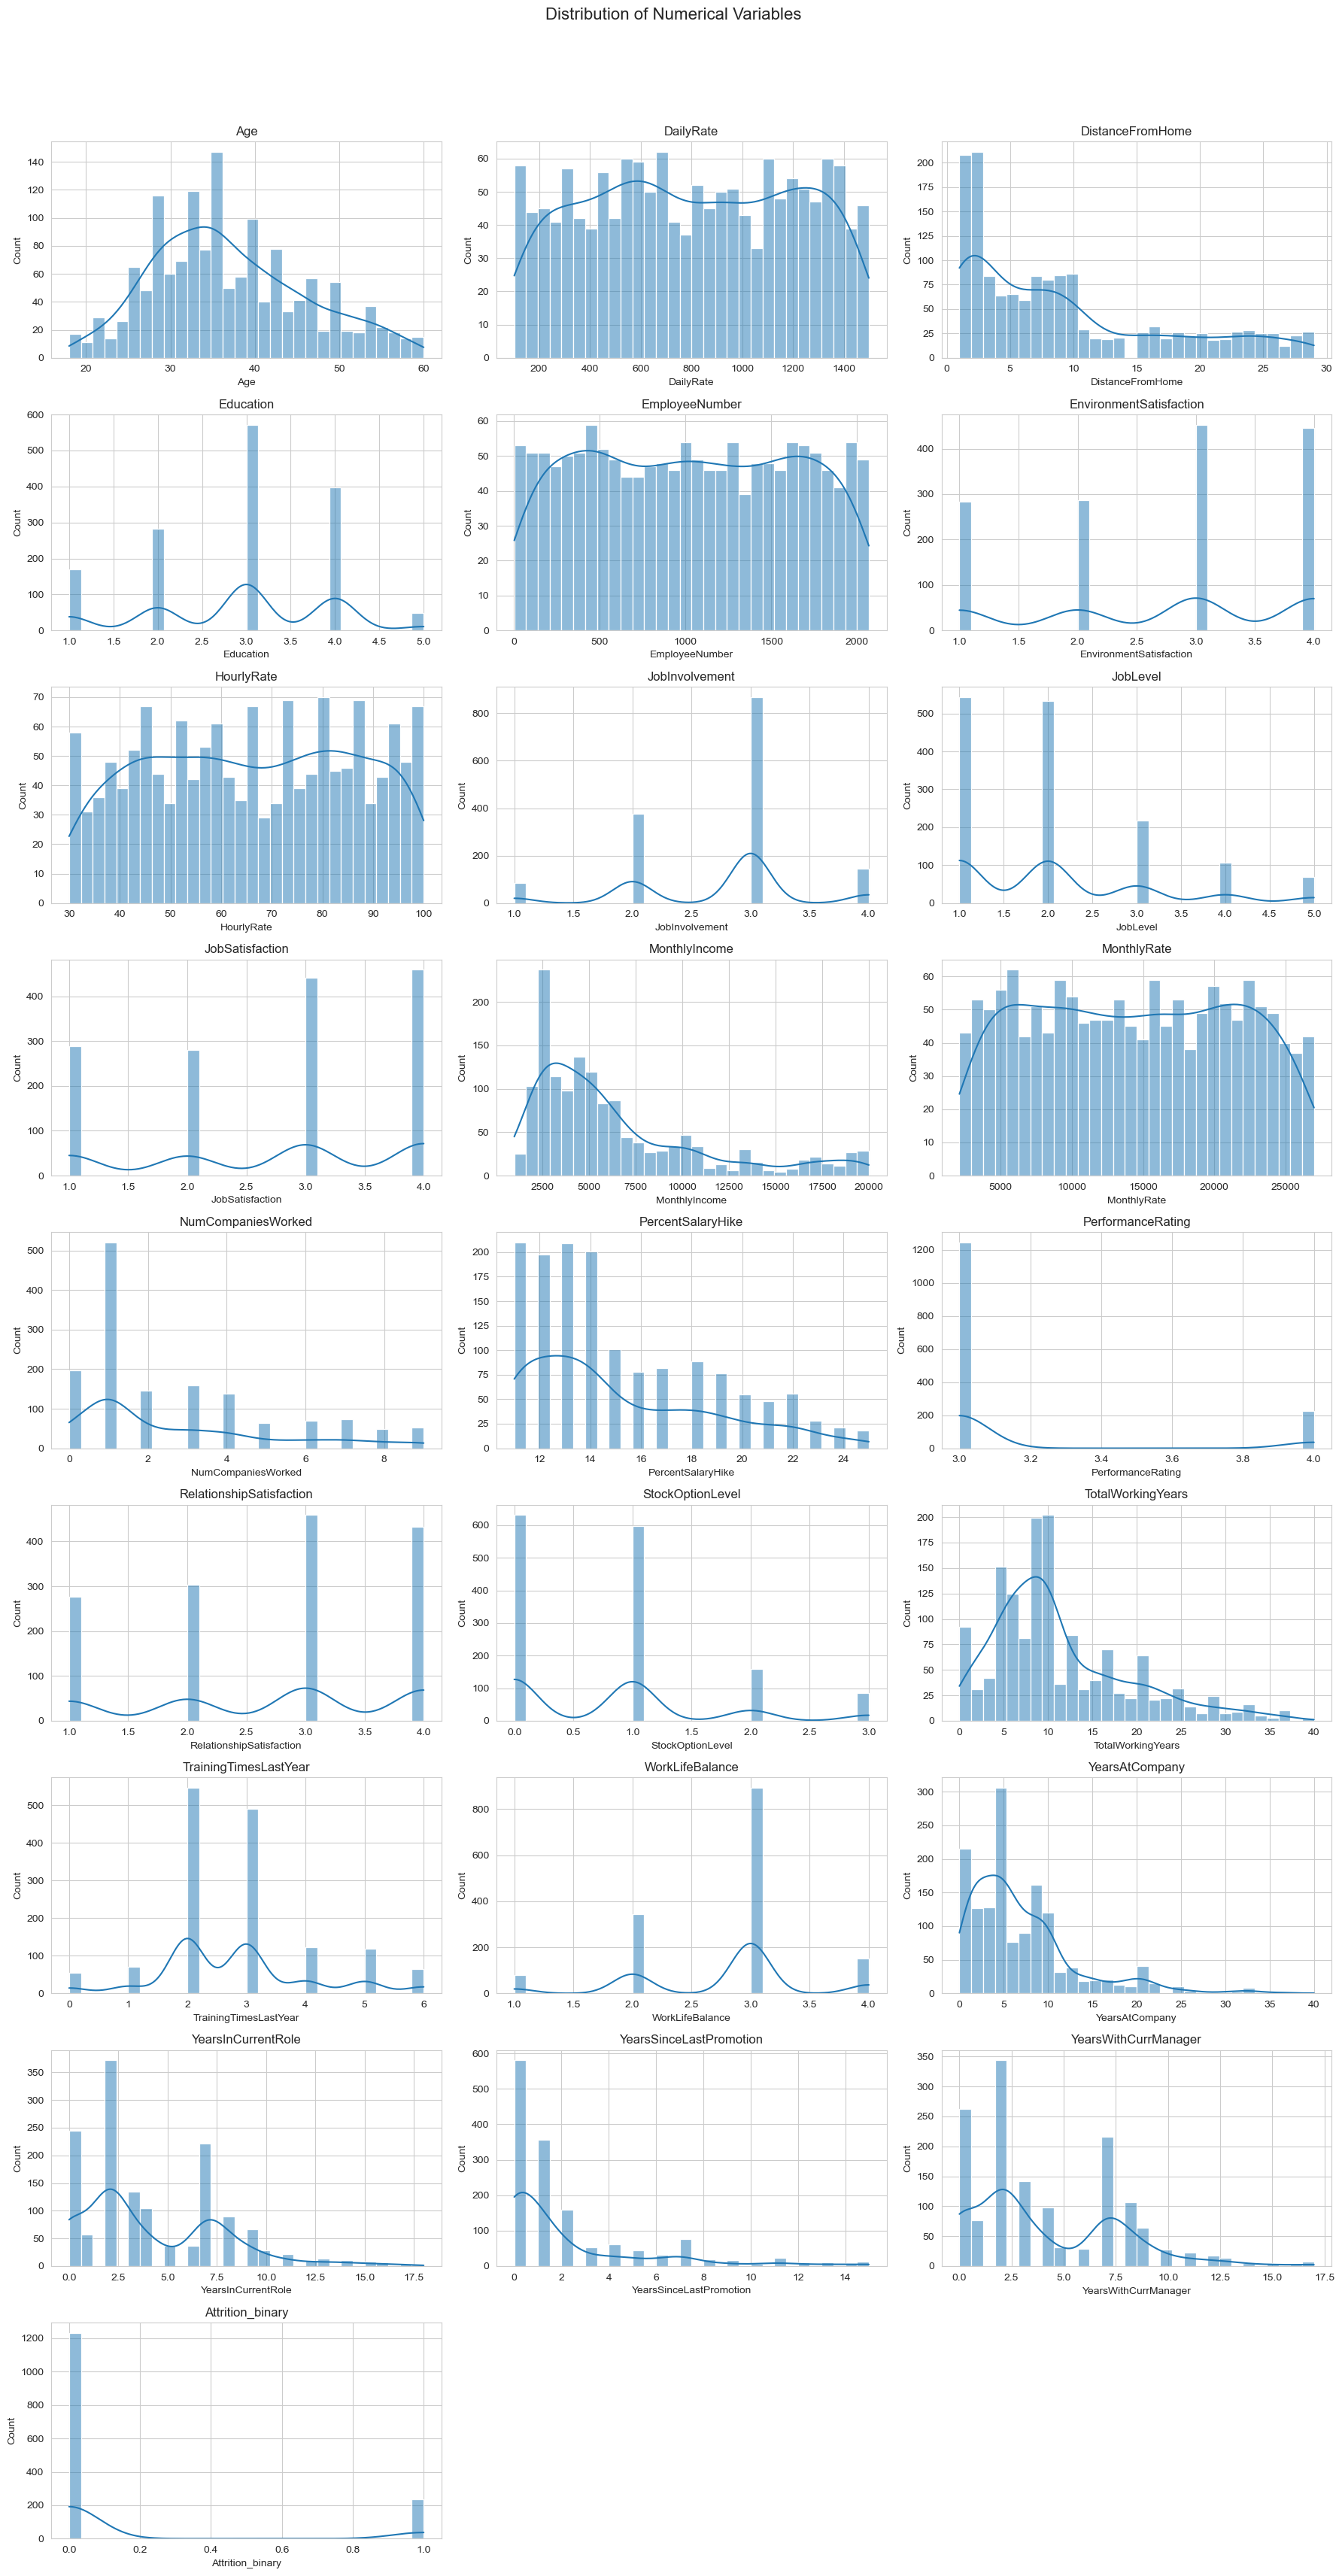

In [10]:
# Plotting distributions for all numerical variables to check for outliers and noise
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Setting up the plotting area
n_rows = len(numerical_variables) // 3 + (len(numerical_variables) % 3 > 0)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, var in enumerate(numerical_variables):
    row = i // 3
    col = i % 3
    sns.histplot(df[var], kde=True, ax=axes[row, col], bins=30)
    axes[row, col].set_title(var)

# Adjust layout to prevent overlap and remove empty subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if len(numerical_variables) % 3:
    for j in range(3 - len(numerical_variables) % 3):
        fig.delaxes(axes.flatten()[-(j + 1)])

plt.show()

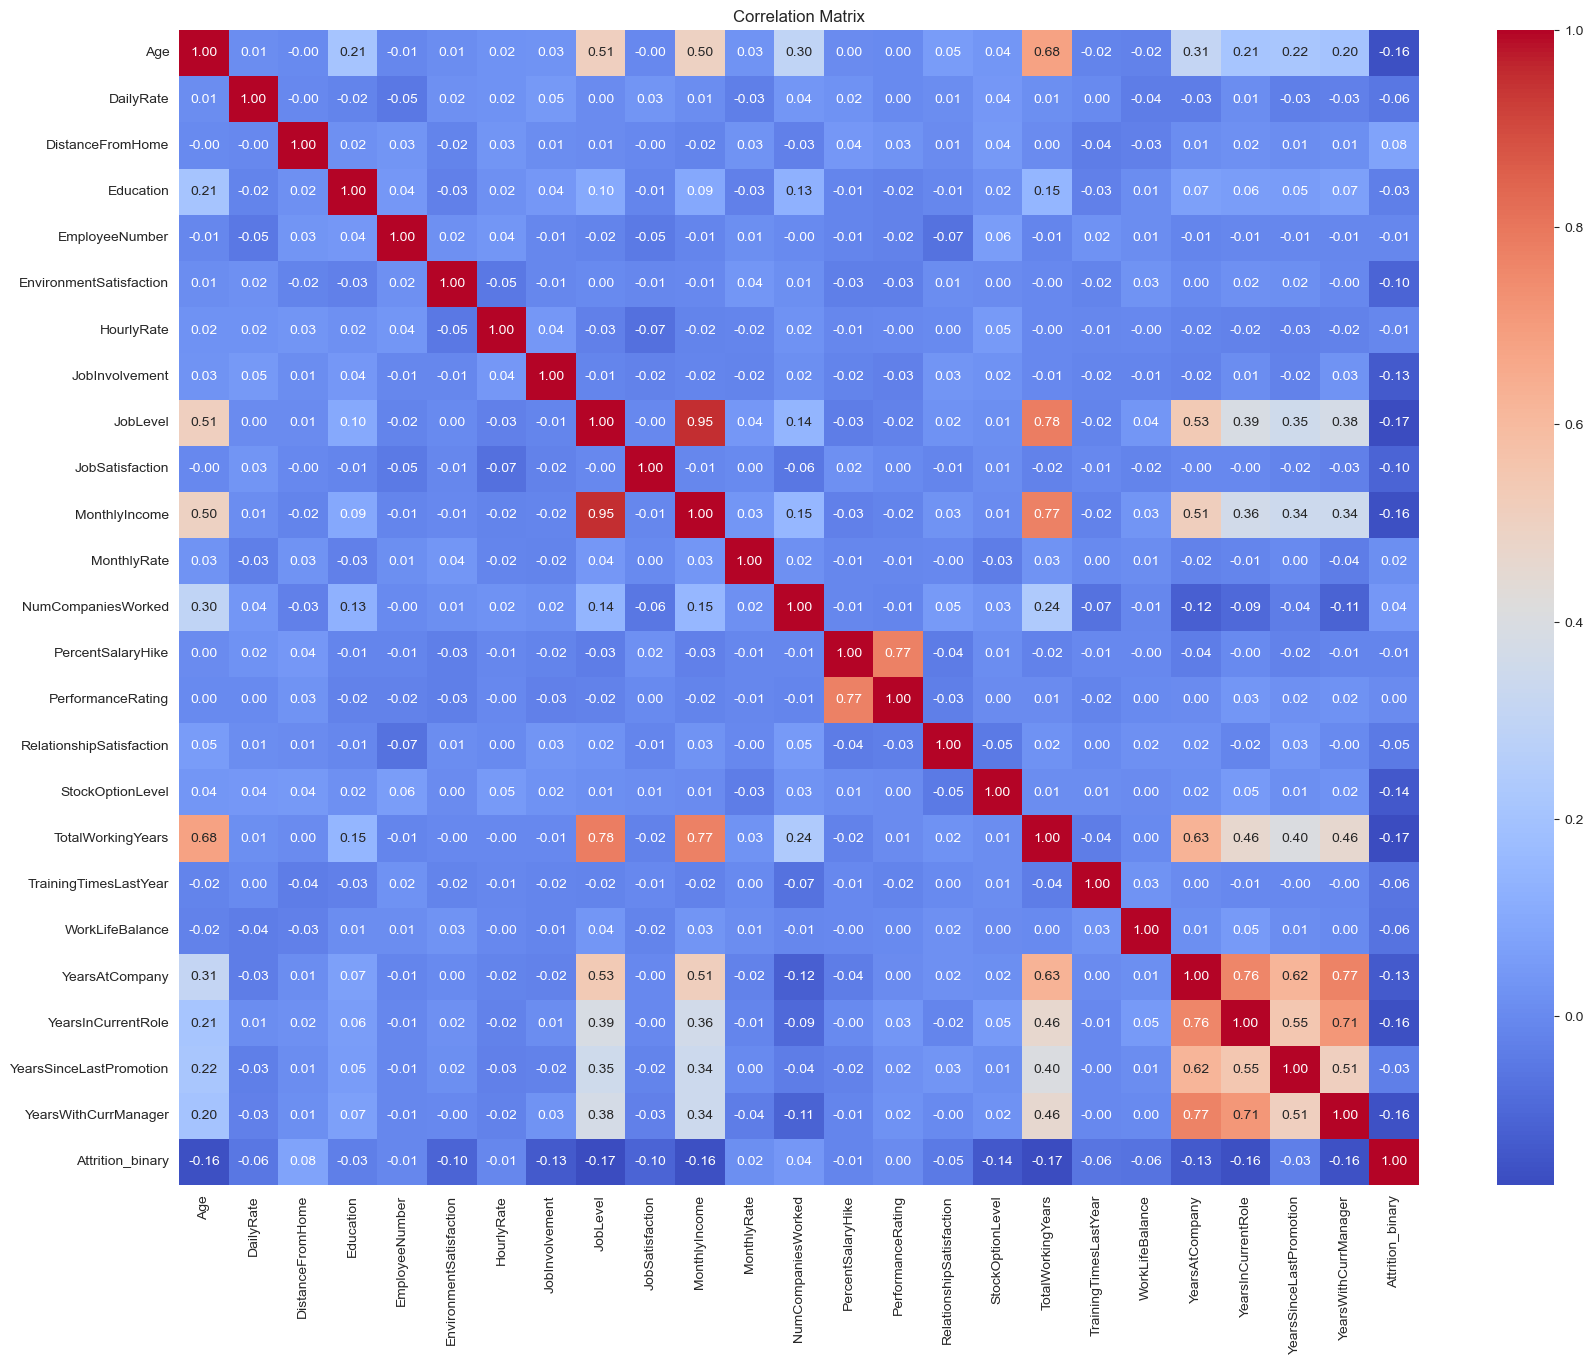

In [11]:
# Calculating the correlation matrix 
correlation_matrix_dropped = df.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_dropped, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

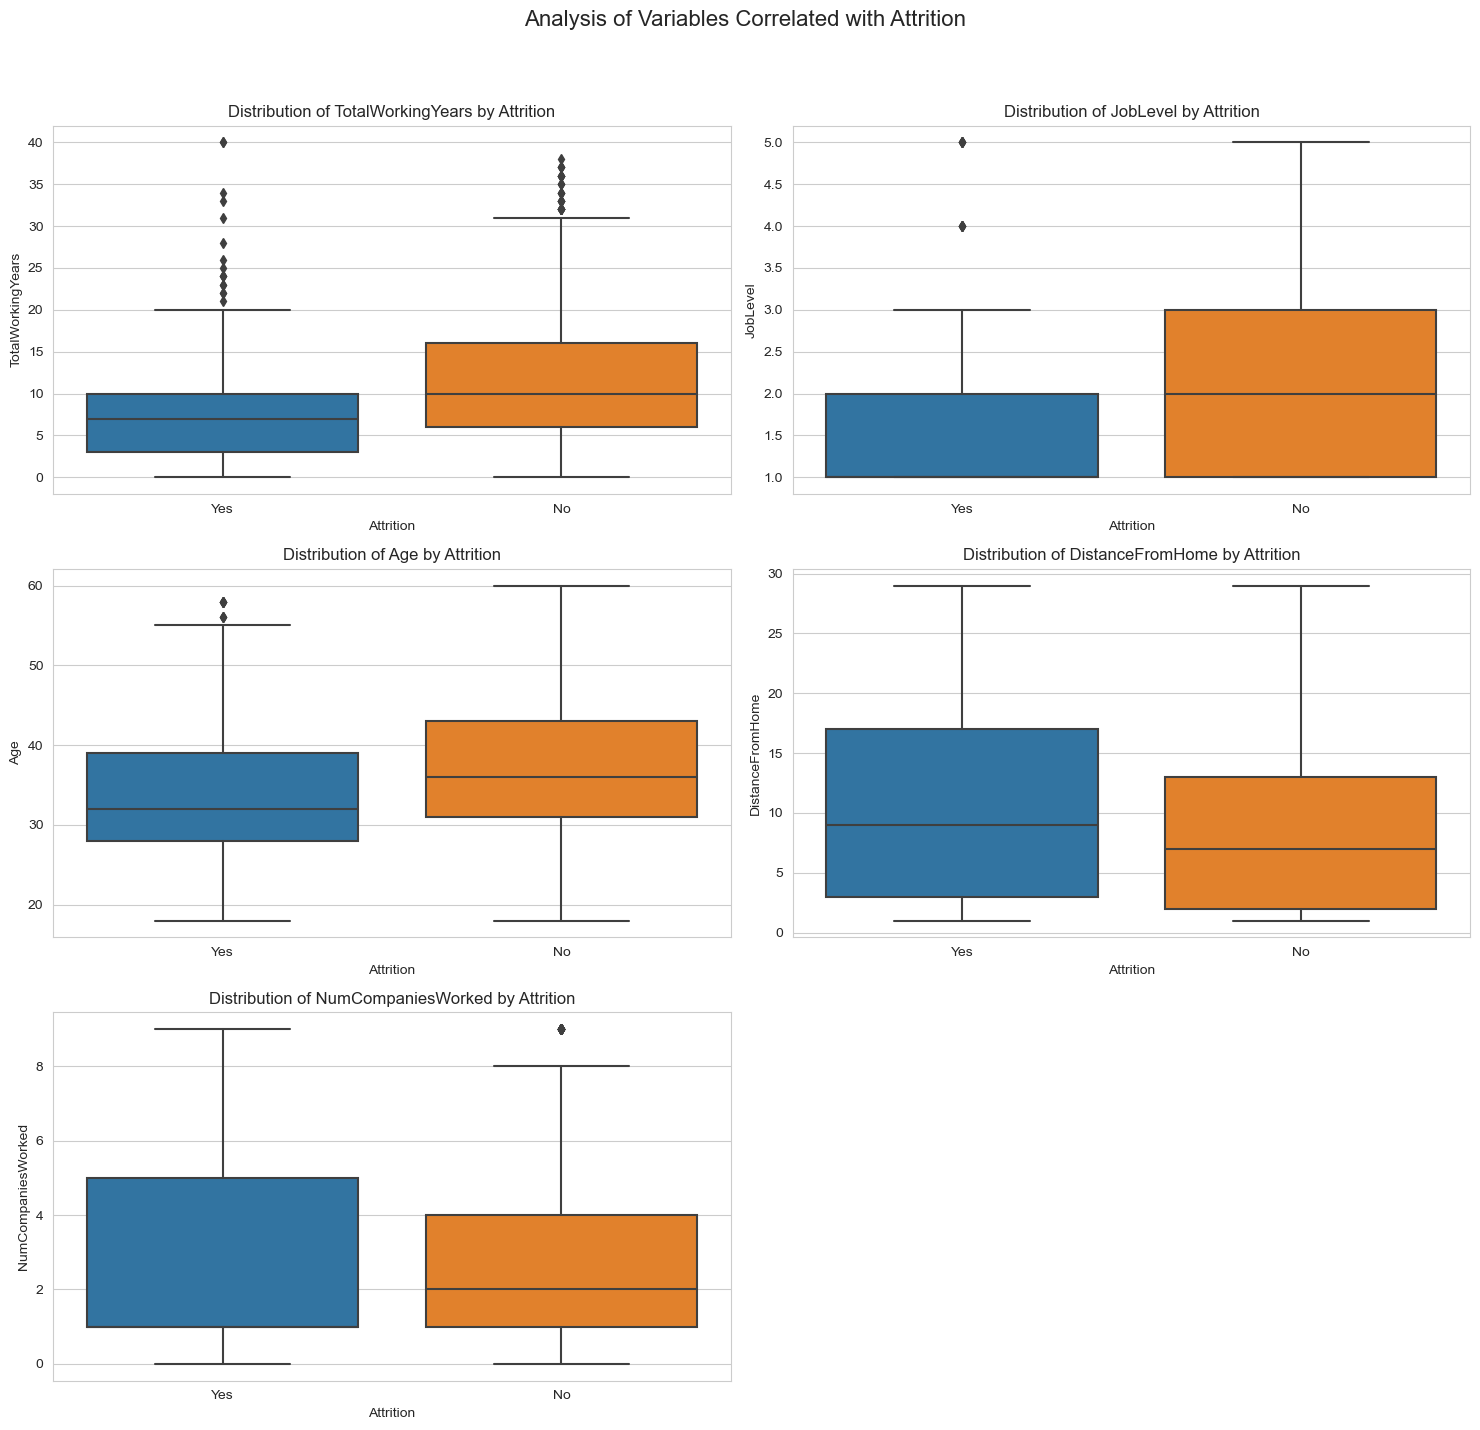

In [12]:
# Check correlated variables with Attrition

# Setting up the plotting area
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Analysis of Variables Correlated with Attrition', fontsize=16)

# Plotting distributions of selected variables against Attrition
variables_to_plot = ['TotalWorkingYears', 'JobLevel', 'Age', 'DistanceFromHome', 'NumCompaniesWorked']
attrition_status = ['Yes', 'No']

for i, var in enumerate(variables_to_plot):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=axes[row, col], x='Attrition', y=var, data=df)
    axes[row, col].set_title(f'Distribution of {var} by Attrition')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Removing the empty subplot (if any)
if len(variables_to_plot) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

### 1.2.4 Categorical Features

In [13]:
# Converting the identified potential categorical variables from 1.2.3 to categorical
categorical_vars = [
    'Education',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'WorkLifeBalance',
    'JobLevel',
    'StockOptionLevel',
    'TrainingTimesLastYear'
]

for var in categorical_vars:
    df[var] = df[var].astype('category')

In [14]:
# Adding original categorical variables for comparison
original_categorical_vars = ['Department', 'BusinessTravel', 'Gender', 'MaritalStatus', 'Over18', 'OverTime','EducationField',
    'JobRole',]
all_categorical_vars = categorical_vars + original_categorical_vars

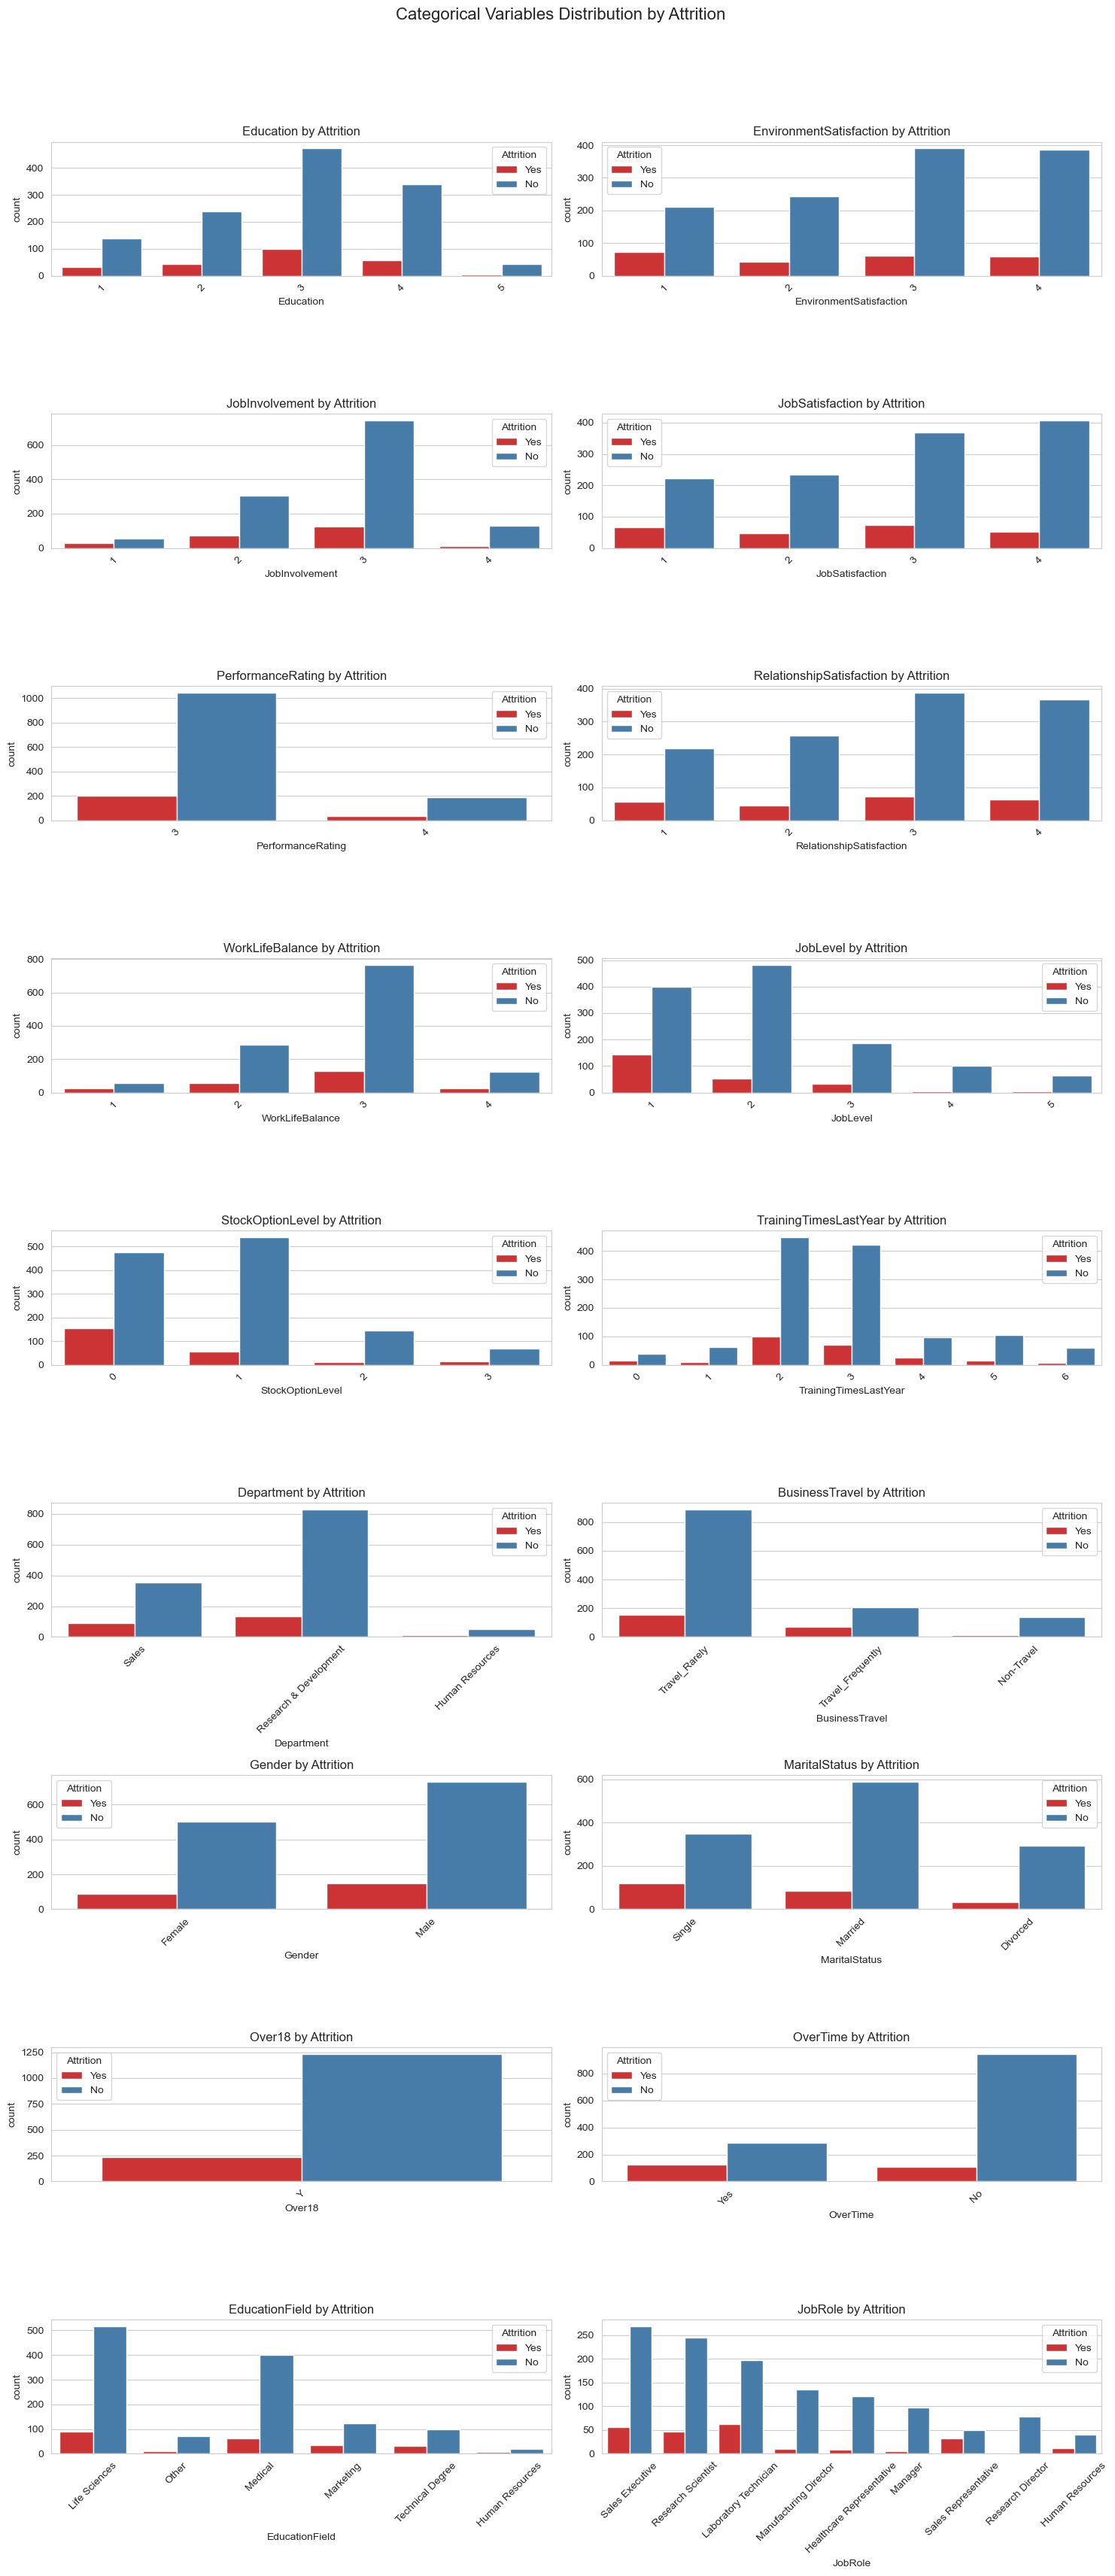

In [15]:
# Setting up the plotting area for categorical variables against Attrition
n_cat_vars = len(all_categorical_vars)
n_rows = n_cat_vars // 2 + (n_cat_vars % 2 > 0)
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 4))
fig.suptitle('Categorical Variables Distribution by Attrition', fontsize=16)

for i, var in enumerate(all_categorical_vars):
    row = i // 2
    col = i % 2
    sns.countplot(ax=axes[row, col], x=var, hue='Attrition', data=df, palette="Set1")
    axes[row, col].set_title(f'{var} by Attrition')
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Removing the empty subplot if an odd number of categorical variables
if n_cat_vars % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

### 1.2.5 VIF Analysis 

In [16]:
# Selecting numerical variables for multicollinearity analysis after transforming categorical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Adding a constant for the intercept
X = add_constant(df[numerical_vars])

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(0, X.shape[1])]

vif_data[1:]

,Variable,VIF
1,Age,2.005141
2,DailyRate,1.015706
3,DistanceFromHome,1.014292
4,EmployeeNumber,1.005897
5,HourlyRate,1.005781
6,MonthlyIncome,2.536239
7,MonthlyRate,1.008155
8,NumCompaniesWorked,1.249910
9,PercentSalaryHike,1.006563
10,TotalWorkingYears,4.644095


### 1.2.6 EDA Conclusion

## 1.3.0 Data Preprocessing Prepared

In [17]:
# Read Excel file again to keep data intact and Drop the 'EmployeeCount' and 'StandardHours' mentioned in 1.2.3
df = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx", engine="openpyxl")

# Dropping 'EmployeeCount' and 'StandardHours' columns
df = df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'], axis=1)

In [18]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

### 1.3.1 One-Hot Encoding

In [19]:
from projectpreprocessing import one_hot_encode
# ['Department', 'MaritalStatus', 'Gender', 'JobRole','EducationField', 'Attrition', 'OverTime', 'BusinessTravel'] # Nominal Variables (No Rank)
df_encoded_nominal = one_hot_encode(df)

In [20]:
df_encoded_nominal.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition_Yes,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


### 1.3.2 Normalization - MinMaxScaler

In [21]:
from projectpreprocessing import min_max_scale

df_scaled = min_max_scale(df_encoded_nominal)

In [22]:
df_scaled.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition_Yes,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 1.3.3 PCA

In [23]:
from projectpreprocessing import apply_pca

df_pca = apply_pca(df_scaled, n_components=3)
df_pca["Attrition_Yes"] = df_pca["Attrition_Yes"].astype(int)

In [24]:
df_pca.head(5)

,PCA_Component_1,PCA_Component_2,PCA_Component_3,Attrition_Yes
0,1.123830,0.873363,-0.500635,1
1,-0.655208,-0.275313,-0.849499,0
2,-0.609492,0.785184,0.280179,1
3,-0.627980,-0.122179,-0.810408,0
4,-0.671011,-0.649345,0.716055,0


# 2.0.0 Models

## 2.1.0 Logistic Regression

### 2.1.1 Create naive logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score,f1_score


# Splitting the dataset into training and testing sets
X = df_scaled.drop('Attrition_Yes', axis=1)
y = df_scaled['Attrition_Yes']

# Initialize the naive model
naive_logistic_model = LogisticRegression(max_iter=100000, n_jobs=-1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify= y)

# Train the model
naive_logistic_model.fit(X_train, y_train)

# Predictions on training set for f-1 calculation
y_train_pred = naive_logistic_model.predict(X_train)

# Get the prediction
y_test_pred = naive_logistic_model.predict(X_test)

# Calculate f-1 score for both training and testing sets #TP/TP+FN
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

f1_train, f1_test

(0.5563380281690141, 0.5555555555555557)

### 2.1.2 Use Cross Validation & Grid Search to find the best parameter

In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Setting up the k-fold cross-validation (with StratifiedKFold for balanced splits)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Defining the model with class weight parameter
log_reg = LogisticRegression(max_iter=10000) 

# Defining the grid of parameters to search over, including class_weight if needed
param_grid = {
    'C': [0.001, 0.002, 0.003, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': [None, 'balanced']  #  n_samples / (n_classes * np.bincount(y))
}

# Setting up the grid search with logistic regression, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(log_reg, param_grid, cv=kfold, scoring='f1', n_jobs=-1)
    
# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
best_params_lr = grid_search.best_params_

In [27]:
print(f"Best Parameters: {best_params_lr}")

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}


### 2.1.3 Learning Curves

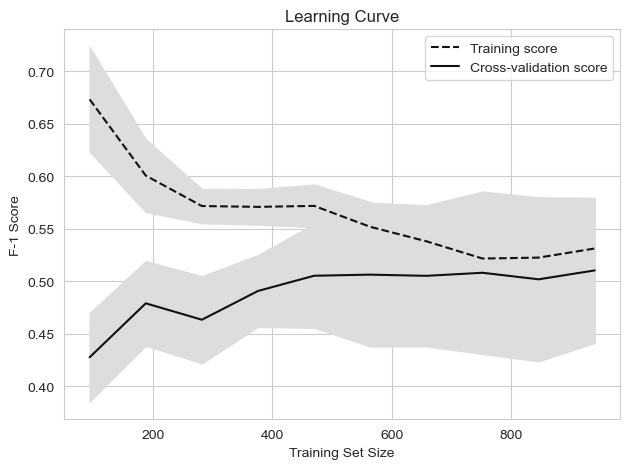

In [28]:
from projectpreprocessing import plot_learning_curves
# Initialize the model with best parameters
best_logistic_regression_model = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')
# Function to plot learning curves
plot_learning_curves(best_logistic_regression_model, X, y, kfold)

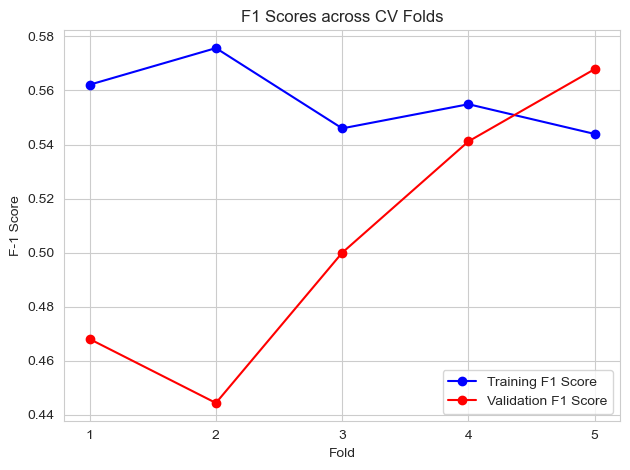

In [29]:
from projectpreprocessing import plot_foldwise_scores
plot_foldwise_scores(best_logistic_regression_model, X_train, y_train, kfold)

### 2.1.4 Precision vs Recall Curve (PR)

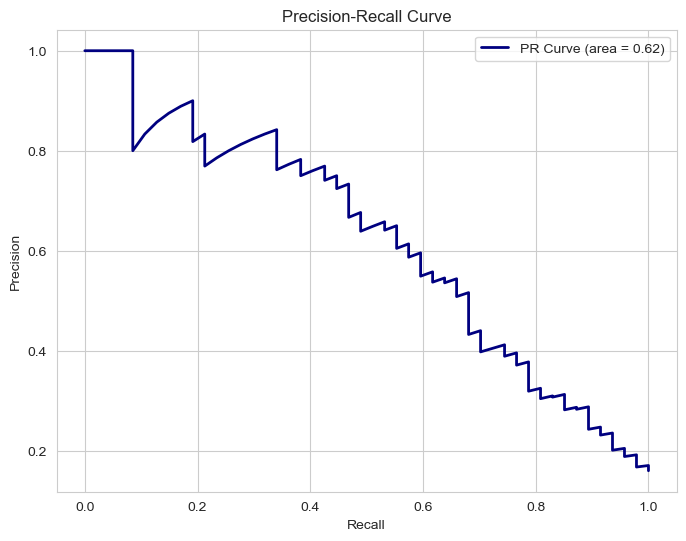

In [30]:
from projectpreprocessing import plot_precision_recall_curve

plot_precision_recall_curve(best_logistic_regression_model, X, y)

The graph demonstrates:




### 2.1.5 Interpret the Model Metric and performance

In [31]:
# Initialize the model with best parameters
best_logistic_regression_model = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)
# Train the model
best_logistic_regression_model.fit(X_train, y_train)
# Get the prediction
y_pred = best_logistic_regression_model.predict(X_test)

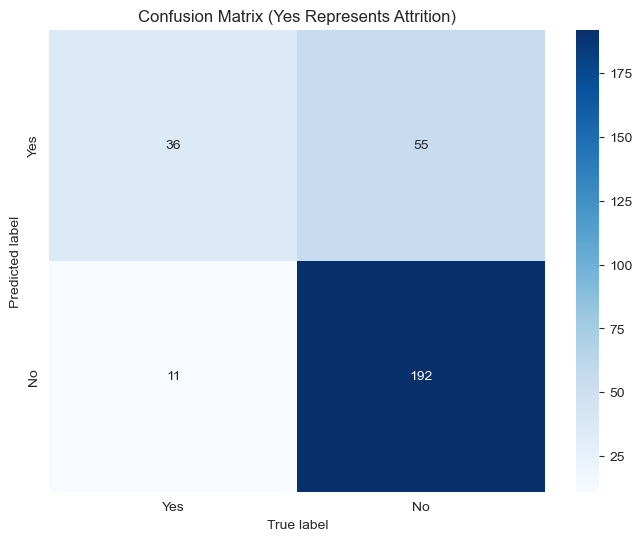

In [32]:
from projectpreprocessing import plot_confusion_matrix
# TP FP
# FN TN
# recall = TP/ TP + FN
# Attrition represents Positive
plot_confusion_matrix(y_test, y_pred) 

In [33]:
from sklearn.metrics import classification_report
# Print classification report for test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.85       247
         1.0       0.40      0.77      0.52        47

    accuracy                           0.78       294
   macro avg       0.67      0.77      0.69       294
weighted avg       0.86      0.78      0.80       294


In [34]:
# Print classification report for training data
y_pred_train = best_logistic_regression_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.85       986
         1.0       0.40      0.77      0.53       190

    accuracy                           0.78      1176
   macro avg       0.67      0.77      0.69      1176
weighted avg       0.86      0.78      0.80      1176


## 2.2.0 SVM

### 2.2.1 Create the naive SVM model

In [35]:
from sklearn.svm import SVC

# Separate features and target variable
X = df_scaled.drop('Attrition_Yes', axis=1)  # Assuming all other columns are features
y = df_scaled['Attrition_Yes'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# model
naive_svm_model = SVC() 
naive_svm_model.fit(X_train, y_train)

# Predictions on training set for f-1 calculation
y_train_pred = naive_svm_model.predict(X_train)

# Get the prediction
y_test_pred = naive_svm_model.predict(X_test)

# Calculate f-1 score for both training and testing sets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

f1_train, f1_test

(0.46774193548387094, 0.3157894736842105)

### 2.2.2 Use Cross Validation & Grid Search to find the best parameter

In [36]:
# Stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Setting up the k-fold cross-validation (with StratifiedKFold for balanced splits)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Defining the SVM model
svm = SVC(random_state=66)

# Defining the grid of parameters to search over
param_grid = {
    'C': [i / 100 for i in range(100, 501)],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Setting up the grid search with SVM, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(svm, param_grid, cv=kfold, scoring='f1', n_jobs=-1) 

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
best_params_svm = grid_search.best_params_

In [37]:
print(f"Best Parameters: {best_params_svm}")

Best Parameters: {'C': 1.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}


### 2.2.3 Learning Curves

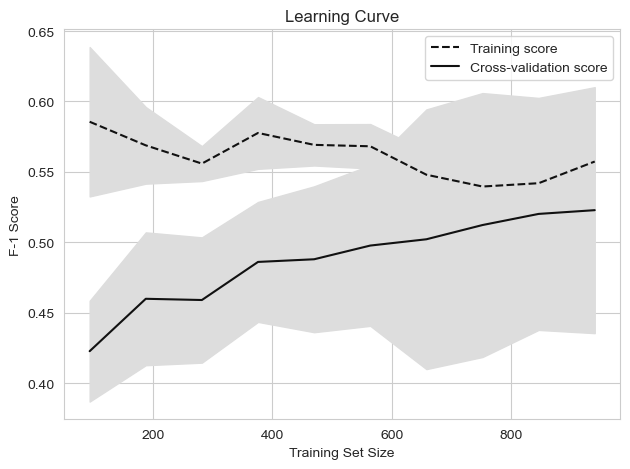

In [38]:
# Initialize the model with best parameters
best_SVM_model = SVC(C=1.1, kernel='rbf', gamma= 'auto', class_weight="balanced")
# Function to plot learning curves
plot_learning_curves(best_SVM_model, X, y, kfold) # Split the data in the function

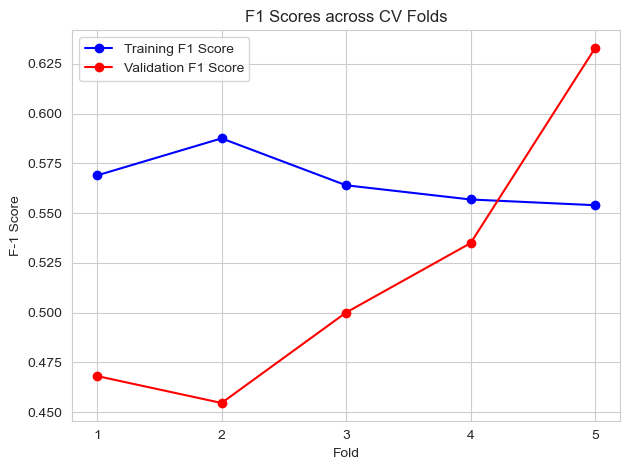

In [39]:
from projectpreprocessing import plot_foldwise_scores
plot_foldwise_scores(best_SVM_model, X_train, y_train, kfold)

### 2.2.4 Precision vs Recall Curve

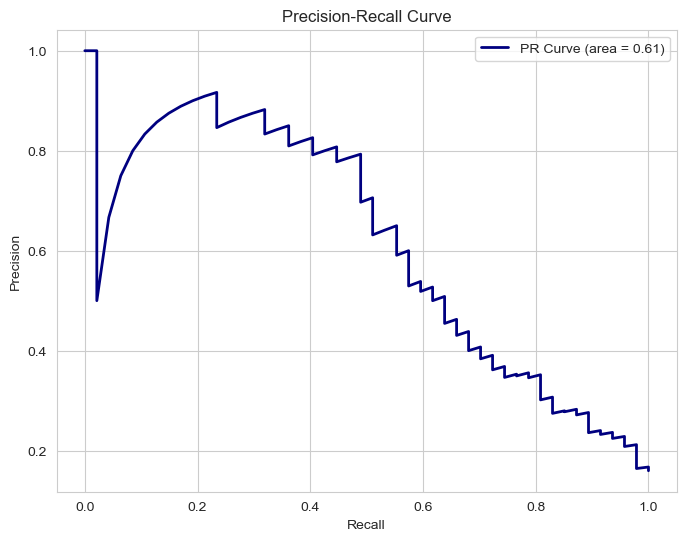

In [40]:
plot_precision_recall_curve(best_SVM_model, X, y)

### 2.2.5 Interpret the Model Metric and performance

In [41]:
# Initialize the model with best parameters
best_SVM_model = SVC(C=1.1, kernel='rbf', gamma= 'auto', class_weight="balanced")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Train the model
best_SVM_model.fit(X_train, y_train)
# Get the prediction
y_pred = best_SVM_model.predict(X_test)

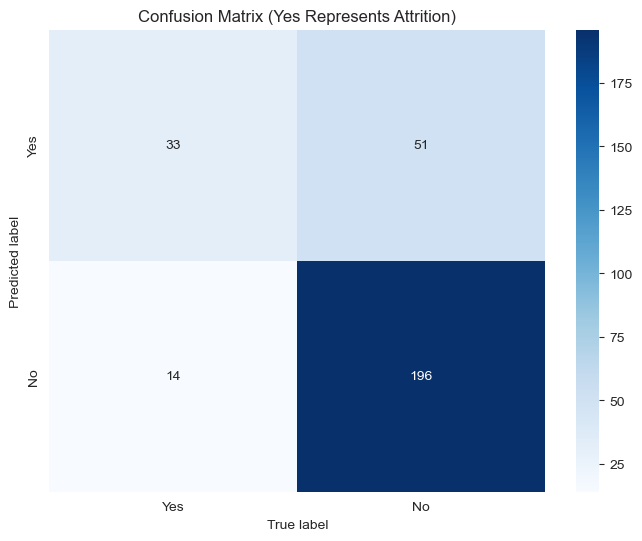

In [42]:
plot_confusion_matrix(y_test, y_pred) 

In [43]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       247
           1       0.39      0.70      0.50        47

    accuracy                           0.78       294
   macro avg       0.66      0.75      0.68       294
weighted avg       0.85      0.78      0.80       294


In [44]:
# Print classification report for training data
y_pred_train = best_SVM_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       986
           1       0.44      0.78      0.56       190

    accuracy                           0.80      1176
   macro avg       0.69      0.79      0.72      1176
weighted avg       0.87      0.80      0.82      1176


## 2.3.0 Random Forest

### 2.3.1 Create naive random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into training and testing sets
X = df_scaled.drop('Attrition_Yes', axis=1)
y = df_scaled['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify= y)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=66)  # You can adjust parameters

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions on training set for f-1 calculation
y_train_pred = rf_classifier.predict(X_train)

# Get the prediction
y_test_pred = rf_classifier.predict(X_test)

# Calculate f-1 score for both training and testing sets #TP/TP+FN
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

f1_train, f1_test

(1.0, 0.14545454545454545)

### 2.3.2 Use Cross Validation & Grid Search to find the best parameter

In [46]:
# Stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Setting up the k-fold cross-validation (with StratifiedKFold for balanced splits)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Defining the Random Forest model
rf = RandomForestClassifier(random_state=66)

# Define the parameter distribution for Random Search
param_distributions_rf = {
    'max_depth': [i for i in range (5, 31, 1)],
    'min_samples_split': [i for i in range(2, 100, 1)],
    'min_samples_leaf': [i for i in range(2, 100, 1)],
    'max_leaf_nodes': [i for i in range(2, 101, 1)],
    'class_weight': ["balanced", None]
}

# Setup Randomized Search with specified iterations
random_search_rf = RandomizedSearchCV(rf, param_distributions_rf, n_iter=5000, cv=kfold, scoring='f1', n_jobs=-1, random_state=66)

# Fit Randomized Search to the data
random_search_rf.fit(X_train, y_train)

# Best parameters, score, and estimator found by Randomized Search
best_params_rf = random_search_rf.best_params_

In [47]:
print(f"Best Parameters: {best_params_rf}")

Best Parameters: {'min_samples_split': 30, 'min_samples_leaf': 4, 'max_leaf_nodes': 93, 'max_depth': 27, 'class_weight': 'balanced'}


### 2.3.3 Learning Curves

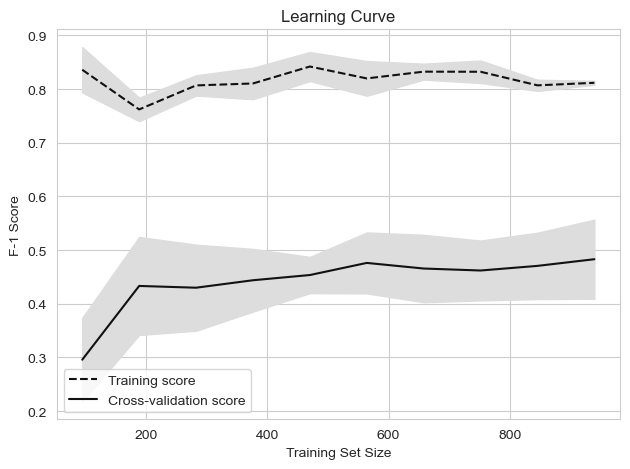

In [67]:
# Initialize the model with best parameters
best_rf_model = RandomForestClassifier(max_depth= 27, max_leaf_nodes = 93, min_samples_leaf= 4, min_samples_split= 30, class_weight= "balanced", n_estimators=500)
# Function to plot learning curves
plot_learning_curves(best_rf_model, X, y, kfold)

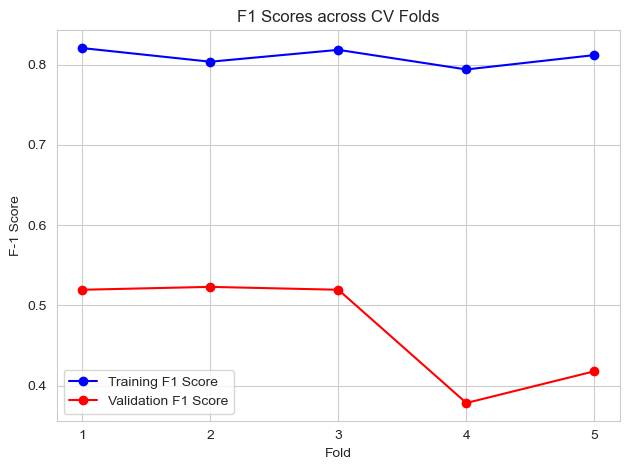

In [68]:
plot_foldwise_scores(best_rf_model, X, y, kfold)

### 2.3.4 Precision vs Recall Curve

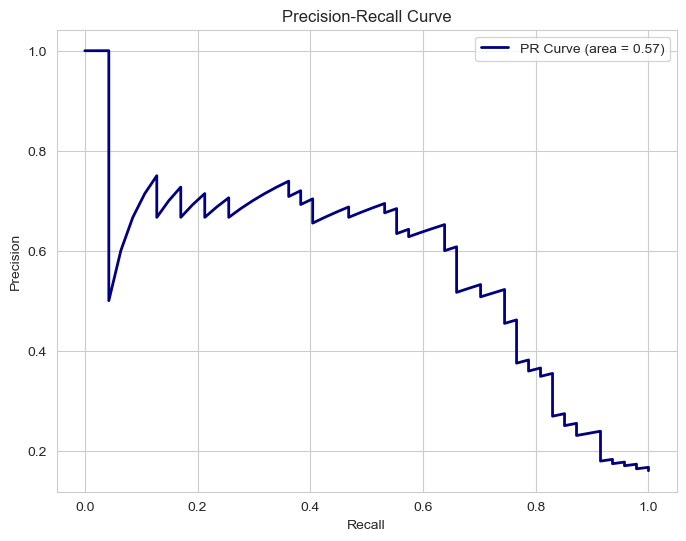

In [69]:
plot_precision_recall_curve(best_rf_model, X, y)

### 2.3.5 Interpret the Model Metric and performance

In [51]:
# Initialize the model with best parameters
best_rf_model = RandomForestClassifier(max_depth= 27, max_leaf_nodes = 93, min_samples_leaf= 4, min_samples_split= 30, class_weight= "balanced", n_estimators=500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Train the model
best_rf_model.fit(X_train, y_train)
# Get the prediction
y_pred = best_rf_model.predict(X_test)

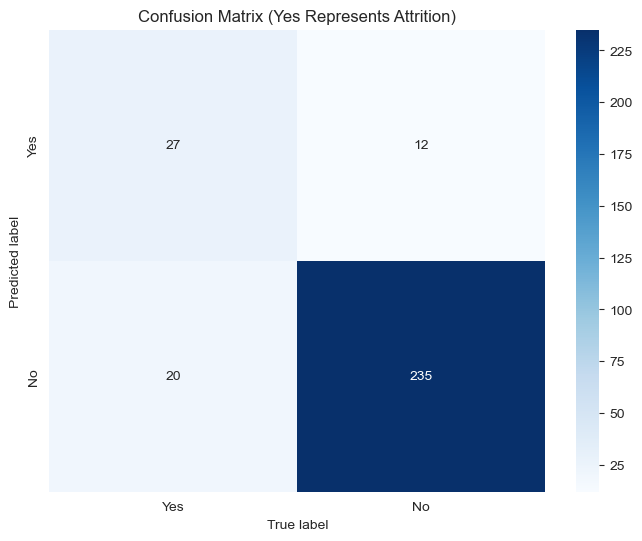

In [52]:
plot_confusion_matrix(y_test, y_pred) 

In [53]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       247
         1.0       0.69      0.57      0.63        47

    accuracy                           0.89       294
   macro avg       0.81      0.76      0.78       294
weighted avg       0.88      0.89      0.89       294


In [54]:
# Print classification report for training data
y_pred_train = best_rf_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       986
         1.0       0.75      0.88      0.81       190

    accuracy                           0.93      1176
   macro avg       0.86      0.91      0.88      1176
weighted avg       0.94      0.93      0.93      1176


### 2.3.6 Check Feature Importance

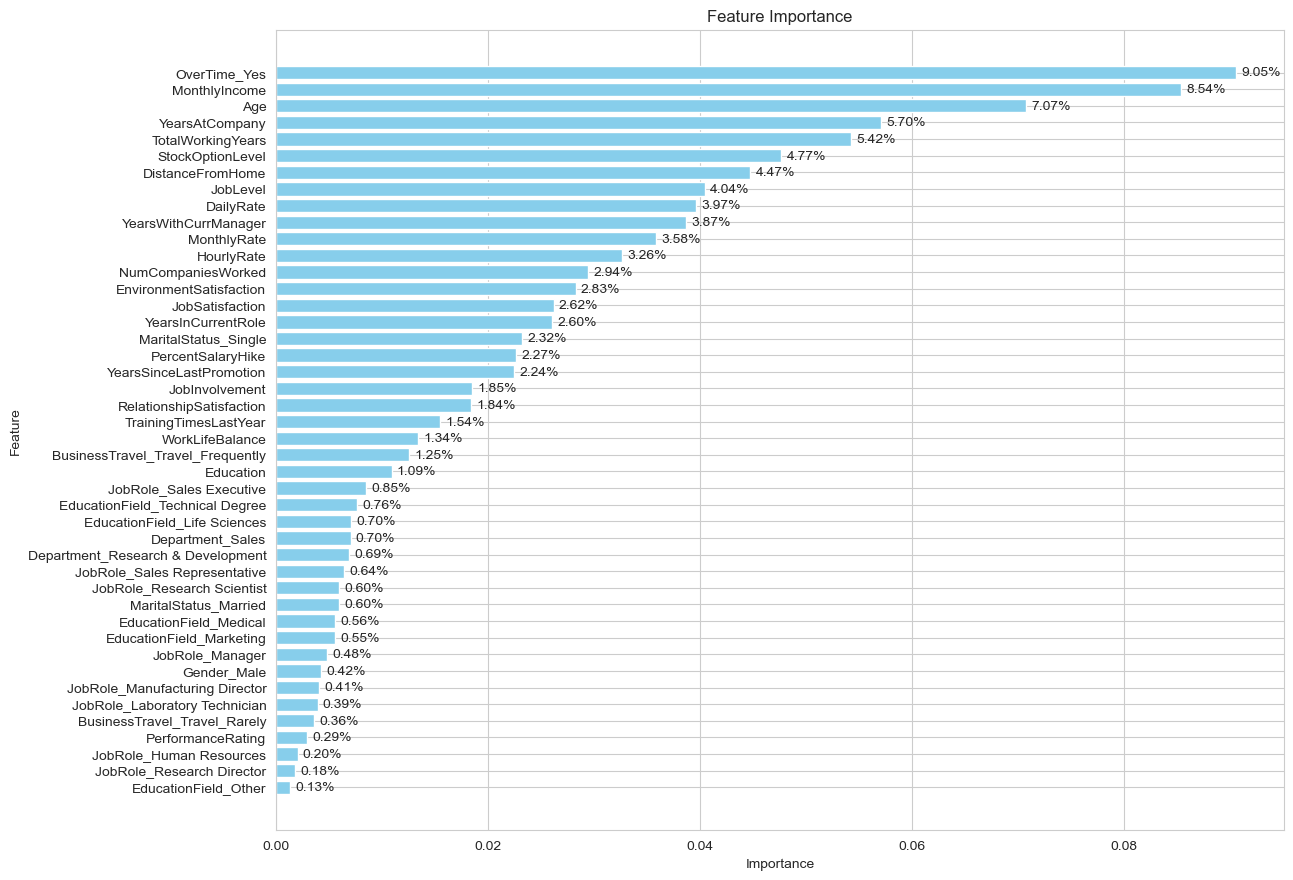

In [55]:
from projectpreprocessing import plot_random_forest_feature_importance
plot_random_forest_feature_importance(best_rf_model, X, y)

## 2.4.0 Ensemble Method

### 2.4.1 Initialize the previously best models

In [56]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
# Separate features and target variable
X = df_scaled.drop('Attrition_Yes', axis=1)  # Assuming all other columns are features
y = df_scaled['Attrition_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify= y)


best_logistic_regression_model = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')
best_SVM_model = SVC(C=1.1, kernel='rbf', gamma= 'auto', class_weight="balanced", probability= True)
best_rf_model = RandomForestClassifier(max_depth= 27, max_leaf_nodes = 93, min_samples_leaf= 4, min_samples_split= 30, class_weight= "balanced", n_estimators=500)

### 2.4.2 Create a naive ensemble model

In [57]:
ensemble_model = VotingClassifier(estimators=[
    ('logistic', best_logistic_regression_model),
    ('svm', best_SVM_model),
    ('randomforest',best_rf_model)
])

# Train the model
ensemble_model.fit(X_train, y_train)

# Predictions on training set for f-1 calculation
y_train_pred = ensemble_model.predict(X_train)

# Get the prediction
y_test_pred = ensemble_model.predict(X_test)

# Calculate f-1 score for both training and testing sets #TP/TP+FN
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

f1_train, f1_test

(0.573055028462998, 0.5190839694656488)

### 2.4.3 Use Cross Validation & Grid Search to find the best parameter

In [58]:
param_grid = {
    'weights': [
        [0.33, 0.33, 0.34],  # Evenly distributed weights
        [0.25, 0.25, 0.5],   # More weight on random forest
        [0.5, 0.25, 0.25],   # More weight on logistic regression
        [0.25, 0.5, 0.25],   # More weight on SVM
    ], 'voting':["hard", "soft"]
}

# Setting up the k-fold cross-validation (with StratifiedKFold for balanced splits)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Initialize GridSearchCV
grid_search_ensemble = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, scoring="f1", cv=kfold, n_jobs=-1)  

# Fitting the grid search to the data
grid_search_ensemble.fit(X_train, y_train)

# Best parameters found
best_params_ensemble = grid_search_ensemble.best_params_

In [59]:
print(f"Best Parameters: {best_params_ensemble}")

Best Parameters: {'voting': 'soft', 'weights': [0.5, 0.25, 0.25]}


### 2.4.4 Learning Curves

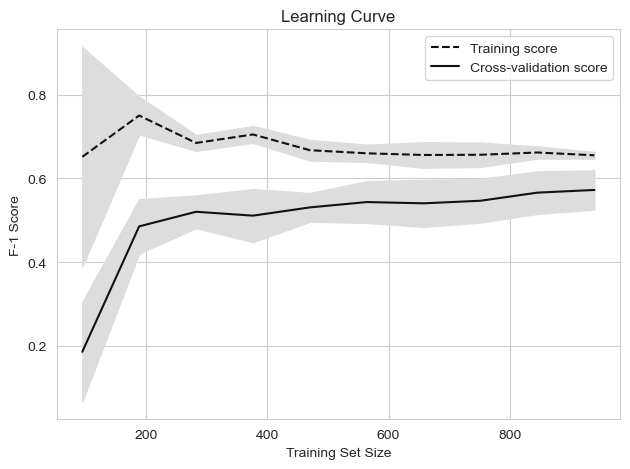

In [60]:
best_ensemble_model = VotingClassifier(estimators=[
    ('logistic', best_logistic_regression_model),
    ('svm', best_SVM_model),
    ('randomforest',best_rf_model)],
    voting= "soft",weights=[0.5, 0.25, 0.25], n_jobs=-1)
# Function to plot learning curves
plot_learning_curves(best_ensemble_model, X, y, kfold)

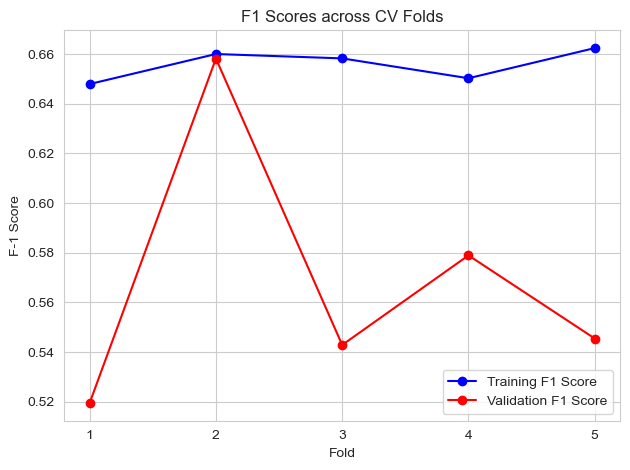

In [61]:
plot_foldwise_scores(best_ensemble_model,X, y, kfold)

### 2.4.5 Precision vs Recall Curve

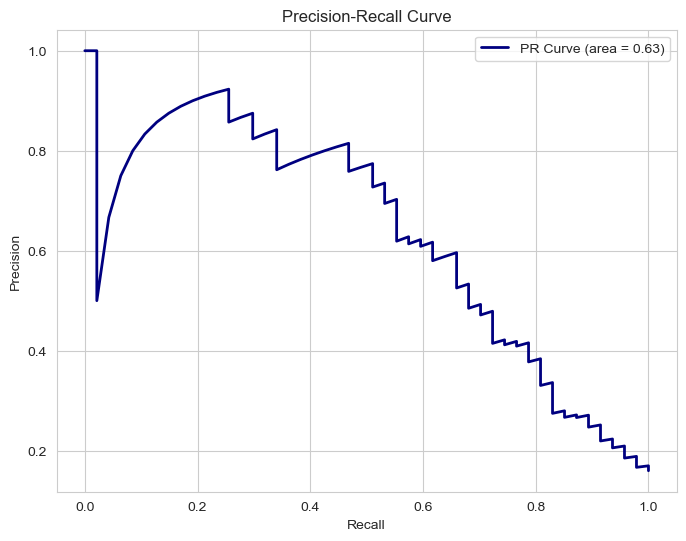

In [62]:
plot_precision_recall_curve(best_ensemble_model, X, y)

### 2.4.6 Interpret the Model Metric and performance

In [63]:
best_ensemble_model = VotingClassifier(estimators=[
    ('logistic', best_logistic_regression_model),
    ('svm', best_SVM_model),
    ('randomforest',best_rf_model)],
    voting= "soft",weights=[0.5, 0.25, 0.25], n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Train the model
best_ensemble_model.fit(X_train, y_train)
# Get the prediction
y_pred = best_ensemble_model.predict(X_test)

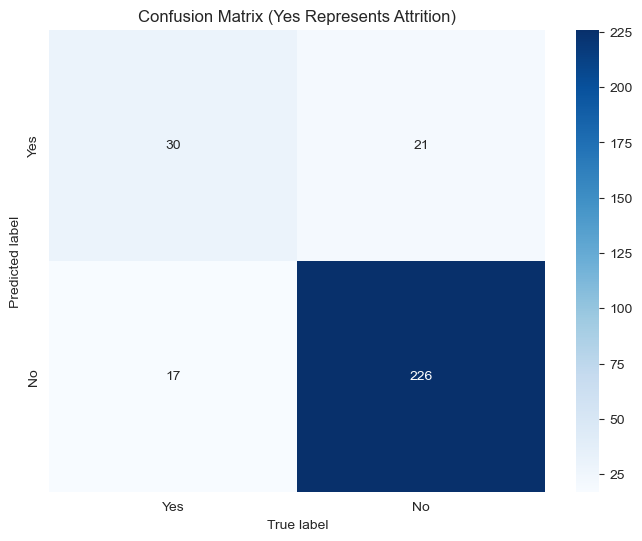

In [64]:
plot_confusion_matrix(y_test, y_pred) 

In [65]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       247
         1.0       0.59      0.64      0.61        47

    accuracy                           0.87       294
   macro avg       0.76      0.78      0.77       294
weighted avg       0.88      0.87      0.87       294


In [66]:
# Print classification report for training data
y_pred_train = best_ensemble_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       986
         1.0       0.63      0.69      0.66       190

    accuracy                           0.89      1176
   macro avg       0.79      0.81      0.80      1176
weighted avg       0.89      0.89      0.89      1176
